In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


data = pd.read_csv('sales_data.csv')
data.head()



,ProductID,ProductName,Category,City,Price,QuantitySold,Month,Year
0,577,Pen,Stationery,Mashhad,154000,199.0,7.0,2022.0
1,616,Desk Lamp,Office Supplies,Mashhad,799000,174.0,4.0,2022.0
2,535,Bookshelf,Furniture,Ahvaz,1469000,396.0,1.0,2024.0
3,416,Mouse,Electronics,Ahvaz,44854000,44.0,2.0,2023.0
4,886,Bookshelf,Furniture,Rasht,4399000,118.0,2.0,2020.0


In [3]:
data.describe()

,ProductID,Price,QuantitySold,Month,Year
count,50000.000000,5.000000e+04,49948.000000,49651.000000,49760.000000
mean,549.381340,1.590999e+07,142.207356,6.499144,2022.006330
std,259.877269,1.610514e+07,153.127378,3.450594,1.415868
min,100.000000,1.000000e+04,1.000000,1.000000,2020.000000
25%,324.000000,1.528000e+06,25.000000,3.000000,2021.000000
50%,550.000000,9.189500e+06,48.000000,6.000000,2022.000000
75%,774.000000,2.960100e+07,256.000000,9.000000,2023.000000
max,998.000000,4.999800e+07,500.000000,12.000000,2024.000000


In [4]:
data['ProductName'].value_counts()


ProductName
Table         3435
Smartphone    3406
Keyboard      3378
Monitor       3374
Tablet        3372
Mouse         3342
Camera        3325
Headphone     3303
Pen           3288
Chair         3286
Notebook      3269
Bookshelf     3267
Printer       3257
Desk Lamp     3234
Laptop        3234
Name: count, dtype: int64

In [12]:
data['Category'].value_counts()


Category
Electronics        30083
Furniture          10029
Stationery          6577
Office Supplies     3245
Name: count, dtype: int64

In [13]:
data['City'].value_counts()

City
Isfahan       5083
Rasht         5078
Qom           5066
Tehran        4996
Karaj         4968
Kermanshah    4961
Shiraz        4959
Tabriz        4944
Ahvaz         4906
Mashhad       4871
Name: count, dtype: int64

In [14]:
data.isna().any()

ProductID       False
ProductName      True
Category         True
City             True
Price           False
QuantitySold     True
Month            True
Year             True
dtype: bool

In [15]:
data.isna().sum()

ProductID         0
ProductName     230
Category         66
City            168
Price             0
QuantitySold     52
Month           349
Year            240
dtype: int64

In [16]:
data.isna().sum().sum()


1105

In [5]:
data['ProductName']=data['ProductName'].fillna('Unknown')

In [128]:
data.isna().sum()

ProductID         0
ProductName       0
Category         66
City            168
Price             0
QuantitySold     52
Month           349
Year            240
dtype: int64

In [6]:
data['ProductName'].value_counts()



ProductName
Table         3435
Smartphone    3406
Keyboard      3378
Monitor       3374
Tablet        3372
Mouse         3342
Camera        3325
Headphone     3303
Pen           3288
Chair         3286
Notebook      3269
Bookshelf     3267
Printer       3257
Desk Lamp     3234
Laptop        3234
Unknown        230
Name: count, dtype: int64

In [7]:
data =data.dropna()

In [8]:
data.isna().sum()

ProductID       0
ProductName     0
Category        0
City            0
Price           0
QuantitySold    0
Month           0
Year            0
dtype: int64

In [26]:
data.shape

(49172, 8)

In [9]:
data.loc[data['ProductID']==1,'ProductName']='Printer'

In [29]:
data


,ProductID,ProductName,Category,City,Price,QuantitySold,Month,Year
0,577,Pen,Stationery,Mashhad,154000,199.0,7.0,2022.0
1,616,Desk Lamp,Office Supplies,Mashhad,799000,174.0,4.0,2022.0
2,535,Bookshelf,Furniture,Ahvaz,1469000,396.0,1.0,2024.0
3,416,Mouse,Electronics,Ahvaz,44854000,44.0,2.0,2023.0
4,886,Bookshelf,Furniture,Rasht,4399000,118.0,2.0,2020.0
...,...,...,...,...,...,...,...,...
49995,311,Chair,Furniture,Tehran,1848000,443.0,10.0,2021.0
49996,480,Pen,Stationery,Isfahan,93000,158.0,6.0,2024.0
49997,941,Headphone,Electronics,Ahvaz,33549000,45.0,5.0,2020.0
49998,594,Laptop,Electronics,Kermanshah,22101000,24.0,3.0,2020.0


In [10]:
Month_Sales = data.groupby('Month')['Price'].sum()

In [10]:
Month_Sales

Month
1.0     64120157000
2.0     65789349000
3.0     65919921000
4.0     64335919000
5.0     66983921000
6.0     67096035000
7.0     63454966000
8.0     65870311000
9.0     66555807000
10.0    68252647000
11.0    65351270000
12.0    66190433000
Name: Price, dtype: int64

<BarContainer object of 12 artists>

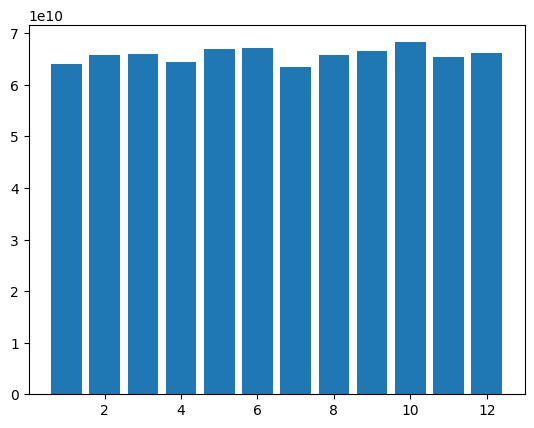

In [11]:
plt.bar(Month_Sales.index,Month_Sales.values)

In [11]:
 BestSalesProduct= data.groupby('ProductName')['QuantitySold'].sum().sort_values(ascending=False)[:10]

In [22]:
BestSalesProduct

ProductName
Table         880110.0
Chair         835062.0
Bookshelf     833496.0
Notebook      832034.0
Pen           828730.0
Desk Lamp     820415.0
Keyboard      235242.0
Smartphone    235043.0
Tablet        233127.0
Mouse         229739.0
Name: QuantitySold, dtype: float64

<BarContainer object of 10 artists>

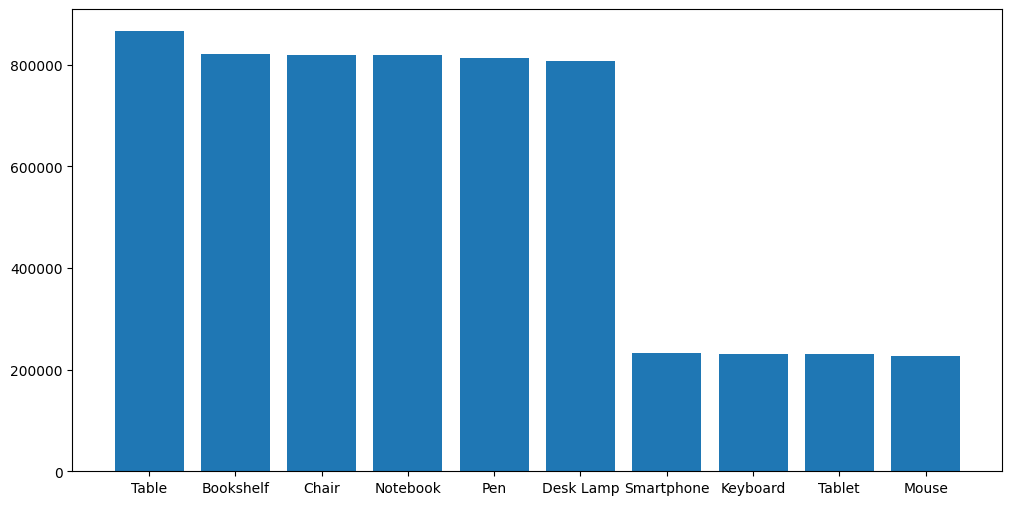

In [12]:
plt.figure(figsize=(12,6))
plt.bar(BestSalesProduct.index,BestSalesProduct.values)

(array([15388.,  7053.,  1527.,  1528.,  1540.,  1531.,  1569.,  1540.,
         1519.,  1500.,  1525.,  1510.,  1522.,  1521.,  1581.,  1527.,
         1487.,  1556.,  1527.,  1549.]),
 array([1.00000e+04, 2.50940e+06, 5.00880e+06, 7.50820e+06, 1.00076e+07,
        1.25070e+07, 1.50064e+07, 1.75058e+07, 2.00052e+07, 2.25046e+07,
        2.50040e+07, 2.75034e+07, 3.00028e+07, 3.25022e+07, 3.50016e+07,
        3.75010e+07, 4.00004e+07, 4.24998e+07, 4.49992e+07, 4.74986e+07,
        4.99980e+07]),
 <BarContainer object of 20 artists>)

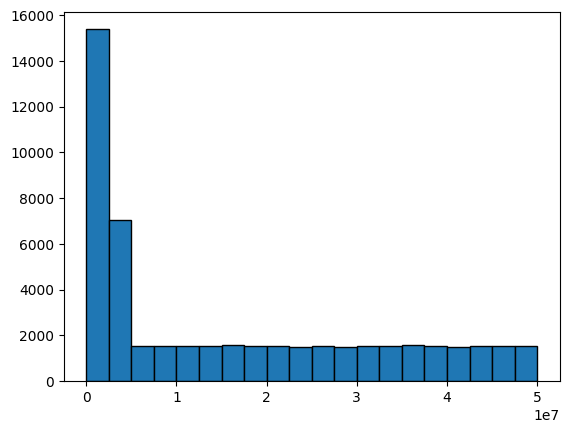

In [30]:
plt.hist(data['Price'],bins=20,edgecolor='k')

In [13]:
salesPerCities = data.groupby('City')


In [33]:
salesPerCities.get_group('Tehran')

,ProductID,ProductName,Category,City,Price,QuantitySold,Month,Year
6,323,Laptop,Electronics,Tehran,42432000,9.0,7.0,2023.0
9,687,Laptop,Electronics,Tehran,34841000,1.0,7.0,2023.0
26,970,Notebook,Stationery,Tehran,44000,434.0,11.0,2021.0
44,740,Pen,Stationery,Tehran,192000,383.0,3.0,2020.0
62,119,Bookshelf,Furniture,Tehran,2858000,45.0,3.0,2022.0
...,...,...,...,...,...,...,...,...
49949,438,Tablet,Electronics,Tehran,10972000,29.0,8.0,2021.0
49954,345,Pen,Stationery,Tehran,29000,426.0,12.0,2022.0
49957,911,Keyboard,Electronics,Tehran,22480000,5.0,11.0,2021.0
49982,465,Chair,Furniture,Tehran,815000,265.0,11.0,2023.0


In [45]:
salesPerCities=data.groupby('City')['Price'].sum()


In [35]:
salesPerCities

City
Ahvaz         77134106000
Isfahan       80187598000
Karaj         79780877000
Kermanshah    80022598000
Mashhad       79161466000
Qom           81792428000
Rasht         81092976000
Shiraz        77285460000
Tabriz        78309404000
Tehran        77984686000
Name: Price, dtype: int64

([<matplotlib.patches.Wedge at 0x12f1b0fd0>,
 [Text(1.0490086114059365, 0.3310301091988299, 'Ahvaz'),
  Text(0.6583894544746236, 0.8812056095126765, 'Isfahan'),
  Text(0.008506919590478614, 1.0999671051077307, 'Karaj'),
  Text(-0.6440984928696415, 0.8917046212076377, 'Kermanshah'),
  Text(-1.0460751291457269, 0.3401864550254036, 'Mashhad'),
  Text(-1.0429665071467034, -0.34960100825112844, 'Qom'),
  Text(-0.6228032106363768, -0.9067062152764924, 'Rasht'),
  Text(0.02834115173494362, -1.0996348389889878, 'Shiraz'),
  Text(0.6590076217428013, -0.880743410128567, 'Tabriz'),
  Text(1.0478868733745477, -0.3345640456016082, 'Tehran')],
 [Text(0.5721865153123289, 0.1805618777448163, '9.7%'),
  Text(0.3591215206225219, 0.4806576051887326, '10.1%'),
  Text(0.00464013795844288, 0.5999820573314893, '10.1%'),
  Text(-0.351326450656168, 0.4863843388405296, '10.1%'),
  Text(-0.5705864340794874, 0.1855562481956747, '10.0%'),
  Text(-0.56889082208002, -0.19069145904607004, '10.3%'),
  Text(-0.33971084

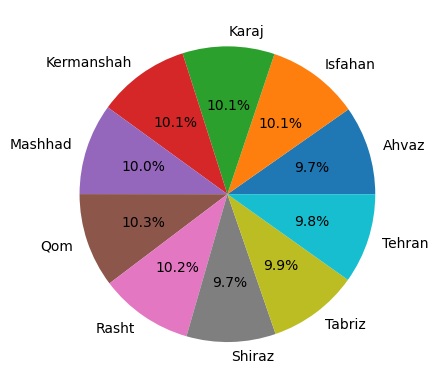

In [40]:
plt.pie(salesPerCities.values,labels=salesPerCities.index,autopct='%1.1f%%')

<BarContainer object of 10 artists>

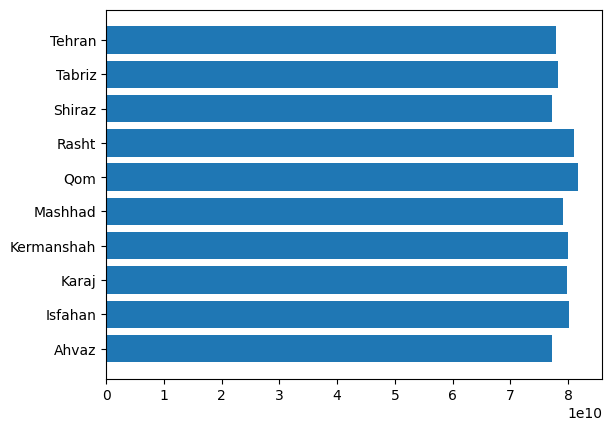

In [46]:
plt.barh(salesPerCities.index,salesPerCities.values)

In [54]:
salesPerCat_sum=data.groupby('Category')['Price'].sum()
salesPerCat_mean=data.groupby('Category')['Price'].mean()

In [55]:
salesPerCat_sum

Category
Electronics        764664015000
Furniture           27425408000
Office Supplies      1717200000
Stationery            688845000
Name: Price, dtype: int64

In [56]:
salesPerCat_mean

Category
Electronics        2.541848e+07
Furniture          2.734610e+06
Office Supplies    5.291834e+05
Stationery         1.047354e+05
Name: Price, dtype: float64

In [60]:
salesPercat=data.groupby('Category').aggregate(Total_Sale=('Price','sum'),Mean_sales=('Price','mean'))

In [63]:
salesPercat

,Total_Sale,Mean_sales
Category,,
Electronics,764664015000,2.541848e+07
Furniture,27425408000,2.734610e+06
Office Supplies,1717200000,5.291834e+05
Stationery,688845000,1.047354e+05


<BarContainer object of 4 artists>

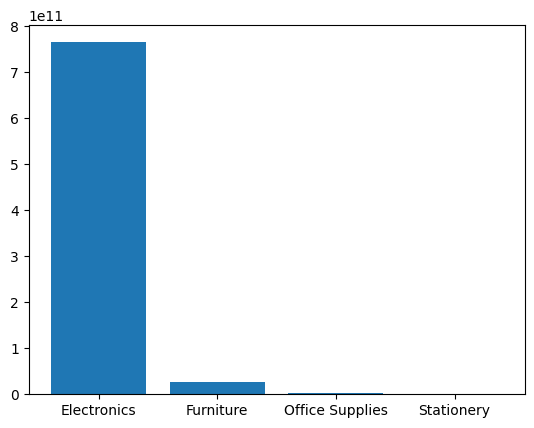

In [65]:
plt.bar(salesPercat['Total_Sale'].index,salesPercat['Total_Sale'].values)

<BarContainer object of 4 artists>

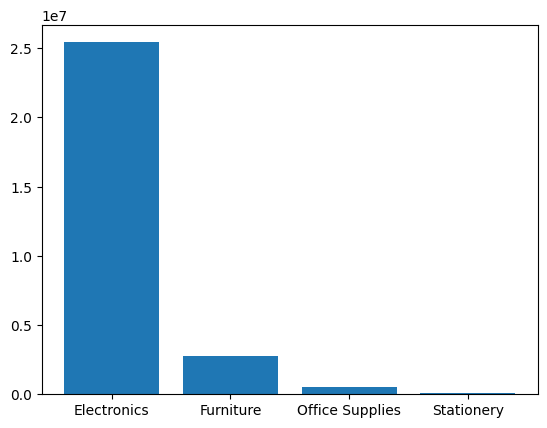

In [66]:
plt.bar(salesPercat['Mean_sales'].index,salesPercat['Mean_sales'].values)

In [104]:
salesPerTime=data.groupby(['Year','Month'])['Price'].sum()

In [108]:
salesPerTime

Year    Month
2020.0  1.0      13016012000
        2.0      13167454000
        3.0      12719356000
        4.0      11945140000
        5.0      12762209000
        6.0      13060775000
        7.0      13114730000
        8.0      13197114000
        9.0      13183113000
        10.0     14911738000
        11.0     12407830000
        12.0     12764842000
2021.0  1.0      13696444000
        2.0      13529285000
        3.0      12581419000
        4.0      13649487000
        5.0      14173998000
        6.0      14127566000
        7.0      11879735000
        8.0      12093737000
        9.0      13890109000
        10.0     14255683000
        11.0     13907505000
        12.0     13460872000
2022.0  1.0      12176282000
        2.0      13156253000
        3.0      13448451000
        4.0      12970258000
        5.0      13638235000
        6.0      13237239000
        7.0      12178479000
        8.0      13150544000
        9.0      13184075000
        10.0     13435177000


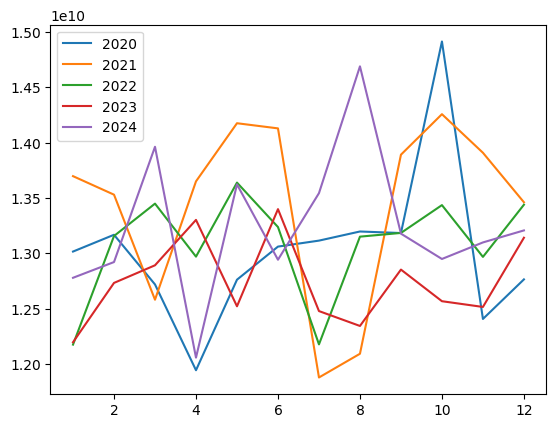

In [118]:
for i in [2020,2021,2022,2023,2024]:
    data_year=salesPerTime.loc[i]
    plt.plot(data_year.index,data_year.values,label=str(i))
plt.legend()

In [15]:
salesPerTime=data.groupby(['Year','Month'])['Price'].sum()
salesPerTime


Year    Month
2020.0  1.0      12979147000
        2.0      13079777000
        3.0      12652096000
        4.0      11942588000
        5.0      12667984000
        6.0      13057048000
        7.0      13024969000
        8.0      13100191000
        9.0      13123944000
        10.0     14839795000
        11.0     12368135000
        12.0     12745302000
2021.0  1.0      13650847000
        2.0      13450154000
        3.0      12513278000
        4.0      13531707000
        5.0      14115154000
        6.0      14105615000
        7.0      11805210000
        8.0      11955628000
        9.0      13790573000
        10.0     14181666000
        11.0     13825322000
        12.0     13359316000
2022.0  1.0      12118957000
        2.0      13150555000
        3.0      13283211000
        4.0      12937421000
        5.0      13501738000
        6.0      13113898000
        7.0      12132366000
        8.0      13094202000
        9.0      12996406000
        10.0     13413790000


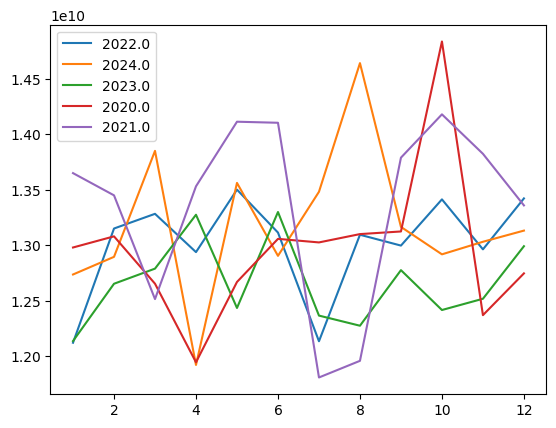

In [16]:
    
for i in data['Year'].unique():
     data_year=salesPerTime.loc[i]
     plt.plot(data_year.index,data_year.values,label=str(i))
plt.legend()

In [17]:
table_data = data[data['ProductName']=='Table']

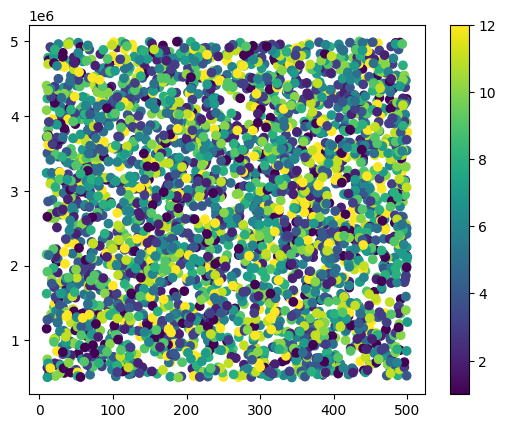

In [18]:
plt.scatter(table_data['QuantitySold'],table_data['Price'],c=table_data['Month'])
plt.colorbar()

In [51]:
best_sale= data.groupby(data['ProductName'])['QuantitySold']

In [53]:
productPerCities = data.groupby('City').apply(lambda x : x.groupby('ProductName')['QuantitySold'].sum().idxmax())

/var/folders/t4/hq0wsdy52cn8hw6l92l0zycr0000gn/T/ipykernel_50623/1776308768.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productPerCities = data.groupby('City').apply(lambda x : x.groupby('ProductName')['QuantitySold'].sum().idxmax())


In [43]:
productPerCities

City     ProductName
Isfahan  Table          96512.0
Tehran   Desk Lamp      96137.0
Karaj    Table          93979.0
Isfahan  Pen            92705.0
Rasht    Chair          91367.0
                         ...   
Ahvaz    Unknown         2674.0
Tehran   Unknown         2548.0
Isfahan  Unknown         2428.0
Mashhad  Unknown         2276.0
Shiraz   Unknown         2237.0
Name: QuantitySold, Length: 160, dtype: float64

<BarContainer object of 5 artists>

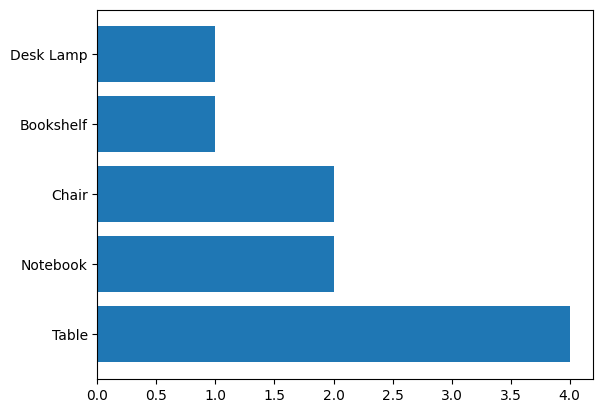

In [54]:
plt.barh(productPerCities.value_counts().index,productPerCities.value_counts().values)

In [55]:
productPerCities.value_counts()

Table        4
Notebook     2
Chair        2
Bookshelf    1
Desk Lamp    1
Name: count, dtype: int64